In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline


In [4]:
df=pd.read_csv('income_evaluation.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [15]:
cols=df.columns.str.strip()

In [16]:
df.columns=cols

In [18]:
df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [19]:
len(df.occupation.unique()) #drop

15

In [12]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

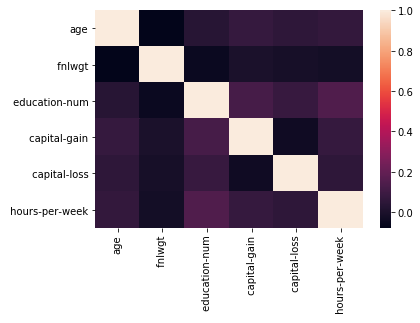

In [10]:
sns.heatmap(df.corr())

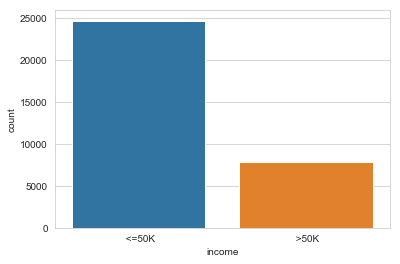

In [98]:

sns.set_style('whitegrid')
sns.countplot(x='income', data=df) 

In [66]:
df.sex=df.sex.str.strip()

In [67]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

In [68]:
df.loc[df["sex"]=="Male","sex"]=1
df.loc[df["sex"]=="Female","sex"]=0

In [69]:
df.sex.head()

0    1
1    1
2    1
3    1
4    0
Name: sex, dtype: int64

In [70]:
df.race.unique()

[4, 2, 1, 0, 3]
Categories (5, int64): [4, 2, 1, 0, 3]

In [73]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

df['race']=le.fit_transform(df['race'])

df.race.head()


0    4
1    4
2    4
3    2
4    2
Name: race, dtype: int64

In [74]:
df.loc[df["income"]==" >50K","income"]=1
df.loc[df["income"]==" <=50K","income"]=0

In [75]:
df.income.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [76]:
df.workclass.unique()

[7, 6, 4, 1, 2, 0, 5, 8, 3]
Categories (9, int64): [7, 6, 4, 1, ..., 0, 5, 8, 3]

In [77]:
df['workclass']=le.fit_transform(df['workclass'])

In [78]:
df.workclass.head()

0    7
1    6
2    4
3    4
4    4
Name: workclass, dtype: int64

In [79]:
df['workclass']=df['workclass'].astype('category')
df['race']=df['race'].astype('category')

In [80]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,4,1,2174,0,40,United-States,0
1,50,6,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,4,1,0,0,13,United-States,0
2,38,4,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,4,1,0,0,40,United-States,0
3,53,4,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,2,1,0,0,40,United-States,0
4,28,4,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,2,0,0,0,40,Cuba,0


In [81]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [82]:
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education           object
education-num        int64
marital-status      object
occupation          object
relationship        object
race              category
sex                  int64
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
income               int64
dtype: object

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=
    ['income','education','marital-status','marital-status','occupation',
     'relationship','native-country','race','workclass'],axis=1), 
           df['income'], test_size=0.20, 
            random_state=101)

In [93]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [94]:
from sklearn.linear_model import LogisticRegression 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

H:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [112]:
#predictions
predictions = logmodel.predict(X_test)
trainpred=logmodel.predict(X_train)

In [125]:
from sklearn.metrics import classification_report
print("Test Score:",classification_report(y_test,predictions),
    "Train Score:", classification_report(y_train,trainpred))

Test Score:               precision    recall  f1-score   support

           0       0.81      0.97      0.88      4972
           1       0.74      0.28      0.40      1541

   micro avg       0.81      0.81      0.81      6513
   macro avg       0.77      0.62      0.64      6513
weighted avg       0.79      0.81      0.77      6513
 Train Score:               precision    recall  f1-score   support

           0       0.80      0.97      0.88     19748
           1       0.72      0.26      0.38      6300

   micro avg       0.80      0.80      0.80     26048
   macro avg       0.76      0.61      0.63     26048
weighted avg       0.78      0.80      0.76     26048



In [98]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[4819  153]
 [1115  426]]


In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
print("Test AUC:",
      roc_auc_score(y_test,predictions),
      "Train AUC:",
roc_auc_score(y_train,trainpred))


Test AUC: 0.6228357712991585 Train AUC: 0.6128536705344483


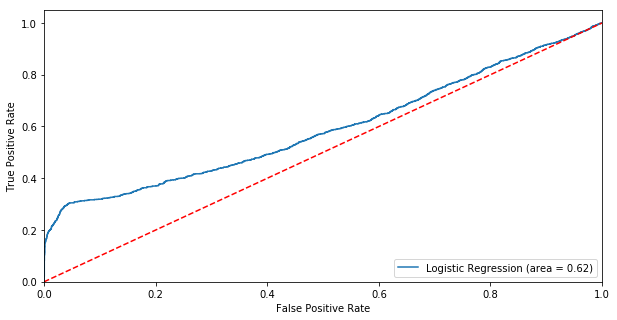

In [103]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1]:
pip install git+https://github.com/sat28/githubcommit.git

  Cloning https://github.com/sat28/githubcommit.git to c:\users\kjaerb~1\appdata\local\temp\pip-req-build-1q9fjhog
  Stored in directory: C:\Users\KJAERB~1\AppData\Local\Temp\pip-ephem-wheel-cache-mdi___9g\wheels\9b\e7\4a\aa6a616dc7cc65dfcd309a19e5b5e1b482825457b8df38d0ca
Successfully built githubcommit
Note: you may need to restart the kernel to use updated packages.


In [ ]:
jupyter serverextension enable --py githubcommit